In [14]:
%matplotlib inline
! pip install matplotlib numpy scikit-fuzzy graphviz ultralytics pandas openrouteservice folium

Defaulting to user installation because normal site-packages is not writeable


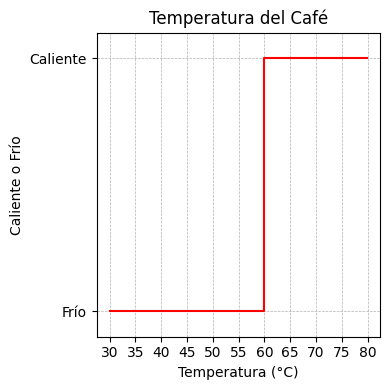

In [6]:
import matplotlib.pyplot as plt
import numpy as np

temperatura_cafe = np.arange(30, 80, 0.1)

plt.figure(figsize=(4, 4))
plt.step(temperatura_cafe, np.where(temperatura_cafe > 60, 1, 0), label='"Caliente" > 60°C', color='red')
plt.title('Temperatura del Café')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Caliente o Frío')
plt.ylim(-0.1, 1.1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(np.arange(30, 81, 5))
plt.yticks([0, 1], ['Frío', 'Caliente'])
plt.tight_layout()
plt.show()



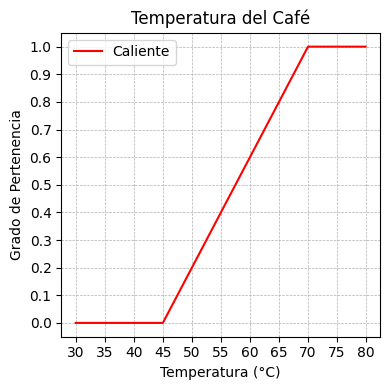

In [5]:
import matplotlib.pyplot as plt
import numpy as np

temperatura_cafe = np.arange(30, 80, 0.1)

difusa_caliente = np.clip((temperatura_cafe - 45) / (70 - 45), 0, 1)

plt.figure(figsize=(4, 4))
plt.plot(temperatura_cafe, difusa_caliente, label='Caliente', color='red')
plt.title('Temperatura del Café')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de Pertenencia')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(np.arange(30, 81, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()


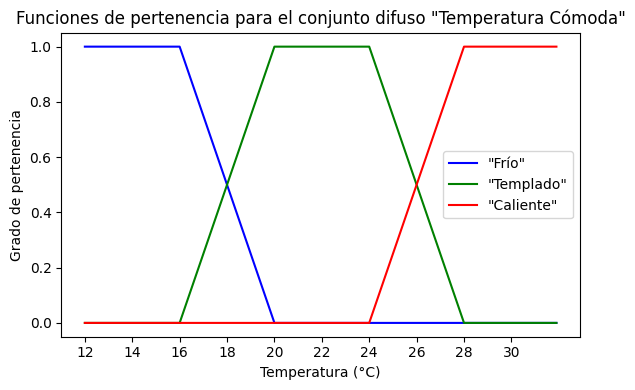

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

temperatura = np.arange(12, 32, 0.1)

pert_frio = fuzz.trapmf(temperatura, [12, 12, 16, 20])
pert_templado = fuzz.trapmf(temperatura, [16, 20, 24, 28])
pert_caliente = fuzz.trapmf(temperatura, [24, 28, 32, 32])

plt.figure(figsize=(6, 4))
plt.plot(temperatura, pert_frio, label='"Frío"', color='blue')
plt.plot(temperatura, pert_templado, label='"Templado"', color='green')
plt.plot(temperatura, pert_caliente, label='"Caliente"', color='red')
plt.title('Funciones de pertenencia para el conjunto difuso "Temperatura Cómoda"')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.xticks(np.arange(12, 31, 2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

flood = ctrl.Antecedent(np.arange(0, 100, 1), 'flood')
objects = ctrl.Antecedent(np.arange(0, 10, 1), 'objects')

path = ctrl.Consequent(np.arange(0, 10, 1), 'path')

flood['low'] = fuzz.trapmf(flood.universe, [0, 0, 10, 30])
flood['medium'] = fuzz.trimf(flood.universe, [10, 30, 50])
flood['high'] = fuzz.trapmf(flood.universe, [30, 50, 100, 100])

objects['small'] = fuzz.trapmf(objects.universe, [0, 0, 1, 3])
objects['medium'] = fuzz.trimf(objects.universe, [1, 3, 5])
objects['large'] = fuzz.trapmf(objects.universe, [3, 5, 10, 10])

path['open'] = fuzz.trapmf(path.universe, [0, 0, 2, 3])
path['precaution'] = fuzz.trapmf(path.universe, [2, 3, 6, 7])
path['close'] = fuzz.trapmf(path.universe, [6, 7, 10, 10])

rule_open = ctrl.Rule((flood['low'] | flood['medium']) & objects['small'], path['open'])

rule_precaution = ctrl.Rule(((flood['low'] | flood['medium']) & objects['medium'])
    | (flood['high'] & objects['small']), path['precaution'])

rule_close = ctrl.Rule(objects['large'] | (flood['high'] & objects['medium']), path['close'])

path_ctrl = ctrl.ControlSystem([rule_open, rule_precaution, rule_close])
path_simulation = ctrl.ControlSystemSimulation(path_ctrl)

path_simulation.input['flood'] = 0
path_simulation.input['objects'] = 0

path_simulation.compute()

print(path_simulation.output['path'])

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

nivelFlood = 30
nivelObjects = 2
nivelMagnitude = 60
graficas = True

flood = ctrl.Antecedent(np.arange(0, 100, 1), 'flood')
objects = ctrl.Antecedent(np.arange(0, 10, 1), 'objects')
magnitude = ctrl.Antecedent(np.arange(54, 74, 1), 'magnitude')

path = ctrl.Consequent(np.arange(0, 11, 1), 'path')

flood['low'] = fuzz.trapmf(flood.universe, [0, 0, 10, 30])
flood['medium'] = fuzz.trimf(flood.universe, [10, 30, 50])
flood['high'] = fuzz.trapmf(flood.universe, [30, 50, 100, 100])

objects['small'] = fuzz.trapmf(objects.universe, [0, 0, 1, 3])
objects['medium'] = fuzz.trimf(objects.universe, [1, 3, 5])
objects['large'] = fuzz.trapmf(objects.universe, [3, 5, 10, 10])

magnitude['info'] = fuzz.trapmf(magnitude.universe, [54, 54, 59, 60])
magnitude['advisory'] = fuzz.trapmf(magnitude.universe, [59, 60, 64, 65])
magnitude['watch'] = fuzz.trapmf(magnitude.universe, [64, 65, 74, 74])

path['open'] = fuzz.trapmf(path.universe, [0, 0, 2, 3])
path['precaution'] = fuzz.trapmf(path.universe, [2, 3, 6, 7])
path['close'] = fuzz.trapmf(path.universe, [6, 7, 10, 10])

rules = [
    ctrl.Rule(flood['low'] & objects['small'] & ~magnitude['watch'], path['open']),
    ctrl.Rule(flood['high'] | objects['large'] | magnitude['watch'], path['close']),
    ctrl.Rule(~flood['high'] & objects['medium'] & ~magnitude['watch'], path['precaution']),
    ctrl.Rule(flood['medium'] & ~objects['large'] & ~magnitude['watch'], path['precaution'])
]

path_ctrl = ctrl.ControlSystem(rules)
path_simulation = ctrl.ControlSystemSimulation(path_ctrl)

path_simulation.input['flood'] = nivelFlood
path_simulation.input['objects'] = nivelObjects
path_simulation.input['magnitude'] = nivelMagnitude

path_simulation.compute()
resultado = path_simulation.output['path']
print("Resultado final:", resultado)


print("Grado de pertenencia a grado de inundación baja: ",fuzz.interp_membership(flood.universe, flood['low'].mf, nivelFlood))
print("Grado de pertenencia a grado de inundación media: ",fuzz.interp_membership(flood.universe, flood['medium'].mf, nivelFlood))
print("Grado de pertenencia a grado de inundación alta: ",fuzz.interp_membership(flood.universe, flood['high'].mf, nivelFlood))
print("Grado de pertenencia a tamaño objetos pequeños: ", fuzz.interp_membership(objects.universe, objects['small'].mf, nivelObjects))
print("Grado de pertenencia a tamaño objetos medianos: ", fuzz.interp_membership(objects.universe, objects['medium'].mf, nivelObjects))
print("Grado de pertenencia a tamaño objetos grandes: ", fuzz.interp_membership(objects.universe, objects['large'].mf, nivelObjects))
print("Grado de pertenencia a grado de magnitud info: ",fuzz.interp_membership(magnitude.universe, magnitude["info"].mf, nivelMagnitude))
print("Grado de pertenencia a grado de magnitud advertencia: ",fuzz.interp_membership(magnitude.universe, magnitude["advisory"].mf, nivelMagnitude))
print("Grado de pertenencia a grado de magnitud alerta: ",fuzz.interp_membership(magnitude.universe, magnitude["watch"].mf, nivelMagnitude))

if graficas:
  flood.view(sim = path_simulation)
  objects.view(sim = path_simulation)
  magnitude.view(sim = path_simulation)
  path.view(sim = path_simulation)
  plt.show()
  
  floodC = np.arange(0, 101, 1)
  objectsC = np.arange(0, 11, 1)
  magnitudeC = np.arange(5.4, 7.5, 0.1)
  pathC = np.arange(0, 11, 1)
  
  flood_low = fuzz.trapmf(floodC, [0, 0, 10, 30])
  flood_medium = fuzz.trimf(floodC, [10, 30, 50])
  flood_high = fuzz.trapmf(floodC, [30, 50, 100, 100])
  
  objects_small = fuzz.trapmf(objectsC, [0, 0, 1, 3])
  objects_medium = fuzz.trimf(objectsC, [1, 3, 5])
  objects_large = fuzz.trapmf(objectsC, [3, 5, 10, 10])
  
  magnitude_info = fuzz.trapmf(magnitudeC, [5.4, 5.4, 5.9, 6.0])
  magnitude_warning = fuzz.trapmf(magnitudeC, [5.9, 6.0, 6.4, 6.5])
  magnitude_alert = fuzz.trapmf(magnitudeC, [6.4, 6.5, 7.4, 7.4])
  
  path_open = fuzz.trapmf(pathC, [0, 0, 2, 3])
  path_precaution = fuzz.trapmf(pathC, [2, 3, 6, 7])
  path_close = fuzz.trapmf(pathC, [6, 7, 10, 10])

  plt.figure(figsize=(5, 3))
  plt.plot(floodC, flood_low, 'g', linewidth=1.5, label='Baja')
  plt.plot(floodC, flood_medium, 'y', linewidth=1.5, label='Media')
  plt.plot(floodC, flood_high, 'r', linewidth=1.5, label='Alta')
  plt.title('Nivel de inundación')
  plt.ylabel('Grado de membresía')
  plt.yticks(np.arange(0, 1.1, 0.2))
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 3))
  plt.plot(objectsC, objects_small, 'g', linewidth=1.5, label='Pequeños')
  plt.plot(objectsC, objects_medium, 'y', linewidth=1.5, label='Medianos')
  plt.plot(objectsC, objects_large, 'r', linewidth=1.5, label='Grandes')
  plt.title('Dimensión de los objetos')
  plt.ylabel('Grado de membresía')
  plt.yticks(np.arange(0, 1.1, 0.2))
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 3))
  plt.plot(magnitudeC, magnitude_info, 'g', linewidth=1.5, label='Info')
  plt.plot(magnitudeC, magnitude_warning, 'y', linewidth=1.5, label='Advertencia')
  plt.plot(magnitudeC, magnitude_alert, 'r', linewidth=1.5, label='Alerta')
  plt.title('Nivel de Magnitud')
  plt.ylabel('Grado de membresía')
  plt.yticks(np.arange(0, 1.1, 0.2))
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 3))
  plt.plot(pathC, path_open, 'g', linewidth=1.5, label='Abierta')
  plt.plot(pathC, path_precaution, 'y', linewidth=1.5, label='Precaución')
  plt.plot(pathC, path_close, 'r', linewidth=1.5, label='Cerrada')
  plt.title('Estado de la vía')
  plt.ylabel('Grado de membresía')
  plt.yticks(np.arange(0, 1.1, 0.2))
  plt.legend()
  plt.tight_layout()
  plt.show()


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


floodC = np.arange(0, 101, 1)
objectsC = np.arange(0, 11, 1)
pathC = np.arange(0, 11, 1)

def triangular_function(x, a, b, c):
    return max(min((x-a)/(b-a), (c-x)/(c-b), 1), 0)

triangular_values = [triangular_function(x, 10, 30, 50) for x in floodC]

plt.figure(figsize=(5, 3))
plt.grid(False)
plt.title('Nivel de inundación')
plt.ylabel('Grado de membresía')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xticks(np.arange(0, 101, step=20))
plt.legend()
plt.tight_layout()

plt.show()

def trapezoidal_function(x, a, b, c, d):
    if x < a or x > d:
        return 0
    elif a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    else:  # c < x < d
        return (d - x) / (d - c)

trapezoidal_values = [trapezoidal_function(x, 0, 0, 10, 30) for x in floodC]

plt.figure(figsize=(5, 3))
plt.plot(floodC, trapezoidal_values, 'g', linewidth=1.5, label='Baja')
plt.title('Nivel de inundación')
plt.ylabel('Grado de membresía')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xticks(np.arange(0, 101, step=20))
plt.axvline(x=10, color='k', linestyle='-')
plt.axhline(y=1, color='r', linestyle='-')
plt.legend()
plt.tight_layout()

plt.show()


objectsC = np.arange(0, 11, 1)
objects_medium_values = [triangular_function(x, 1, 3, 5) for x in objectsC]

plt.figure(figsize=(5, 3))

plt.xlim(0, 10)  

plt.plot(objectsC, objects_medium_values, 'y', linewidth=1.5, label='Medianos', zorder=3)

# Añadir títulos y etiquetas
plt.title('Dimensión de los objetos')
plt.ylabel('Grado de membresía')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xticks(np.arange(0, 11, 2))
plt.axvline(x=3.5, color='k', linestyle='-')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend()
plt.grid(False) 
plt.tight_layout()


plt.show()

objects_large = [trapezoidal_function(x,3, 5, 10, 10) for x in objectsC]
plt.figure(figsize=(5, 3))
plt.plot(objectsC, objects_large, 'r', linewidth=1.5, label='Grandes')
plt.title('Dimensión de los objetos')
plt.ylabel('Grado de membresía')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.axvline(x=3.5, color='k', linestyle='-')
plt.axhline(y=0.25, color='r', linestyle='-')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

pathC = np.arange(0, 11, 1)

def trapezoidal_function(x, a, b, c, d):
    if x < a or x > d:
        return 0
    elif a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    else:  # c < x < d
        return (d - x) / (d - c)

path_precaution_values = [trapezoidal_function(x, 2, 3, 6, 7) for x in pathC]


plt.figure(figsize=(5, 3))
plt.fill_between(pathC, 0, path_precaution_values, color='yellow')
plt.fill_between(pathC, 0.75, 1, color='white', alpha=1, zorder=2)
plt.plot(pathC, path_precaution_values, 'y', linewidth=1.5, label='Precaución', zorder=3)
plt.axhline(y=0.75, color='r', linestyle='-')
plt.title('Estado de la vía')
plt.ylabel('Grado de membresía')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xticks(np.arange(0, 11, 2))
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

path_close = [trapezoidal_function(x, 6, 7, 10, 10) for x in pathC]

plt.figure(figsize=(5, 3))
plt.fill_between(pathC, 0, [min(y, 1) for y in path_close], color='red')
plt.fill_between(pathC, 0.25, 1, color='white', alpha=1, zorder=2)
plt.plot(pathC, path_close, 'r', linewidth=1.5, label='Cerrada', zorder=3)
plt.axhline(y=0.25, color='r', linestyle='-')
plt.title('Estado de la vía')
plt.ylabel('Grado de membresía')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xticks(np.arange(0, 11, 2))
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_rise = np.linspace(2, 2.75, num=100)
y_rise = np.interp(x_rise, [2, 2.75], [0, 0.75])

x_fall = np.linspace(6, 6.75, num=100)
y_fall = np.interp(x_fall, [6, 6.75], [0.75, 0.25])

x_values = np.concatenate([[0, 2], x_rise, [2.75, 6], x_fall, [6.75, 10]])
y_values = np.concatenate([[0, 0], y_rise, [0.75, 0.75], y_fall, [0.25, 0.25]])

dx = np.diff(x_values)
x_midpoints = x_values[:-1] + dx/2
area = np.sum(dx * y_values[:-1])
centroid_x = np.sum(dx * y_values[:-1] * x_midpoints) / area

fig, ax = plt.subplots(figsize=(5, 3))

ax.fill_between(x_values, y_values, color='lightblue')

ax.axvline(x=centroid_x, color='black', linestyle='-')

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.2))

ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 2))

ax.set_title('Estado de la vía')
ax.set_ylabel('Grado de membresía')
ax.set_xlabel('')

print(centroid_x)
plt.show()


In [ ]:
from graphviz import Digraph

dot_horizontal = Digraph()

dot_horizontal.node('P1', label='<P1<br/><FONT POINT-SIZE="15">●●●</FONT>>', shape='circle', fixedsize='true', width='1')
dot_horizontal.node('P2', label='P2', shape='circle', fixedsize='true', width='1')

dot_horizontal.node('T1', 'T1', shape='square')

dot_horizontal.edge('P1', 'T1', label='<2>')
dot_horizontal.edge('T1', 'P2')

dot_horizontal.graph_attr['rankdir'] = 'LR'
dot_horizontal.render('/home/lln/petriNetEj', format='png', cleanup=True)

dot_horizontal




In [ ]:
from graphviz import Digraph

dot_horizontal = Digraph()

dot_horizontal.node('P1', label='<P1<br/><FONT POINT-SIZE="15">●</FONT>>', shape='circle', width='1')
dot_horizontal.node('P2', label='<P2<br/><FONT POINT-SIZE="15">●</FONT>>', shape='circle', width='1')

dot_horizontal.node('T1', 'T1', shape='square')

dot_horizontal.edge('P1', 'T1', label='<2>')
dot_horizontal.edge('T1', 'P2')

dot_horizontal.graph_attr['rankdir'] = 'LR'
dot_horizontal.render('/home/lln/petriNetEjT', format='png', cleanup=True)

dot_horizontal

In [ ]:
from graphviz import Digraph

dot_traffic_cpn = Digraph()

dot_traffic_cpn.node('P1', '<P1<br/><FONT POINT-SIZE="10">● - Bus [P1]<br/>● - Coche [P1]<br/>● - Ambulancia [P1]</FONT>>', shape='circle',fixedsize='true', width='1.7')
dot_traffic_cpn.node('P2', 'P2', shape='circle', fixedsize='true', width='1.7')

dot_traffic_cpn.node('T1', '<T1<br/><FONT POINT-SIZE="10">Evaluar tráfico</FONT>>', shape='square')

dot_traffic_cpn.edge('P1', 'T1', label='<Si vehículo de<br/>emergencia>')
dot_traffic_cpn.edge('T1', 'P2', label='<Actualizar estado<br/>del tráfico>')

dot_traffic_cpn.graph_attr['rankdir'] = 'LR'
dot_traffic_cpn.render('/home/lln/CPNEJ', format='png', cleanup=True)

dot_traffic_cpn


In [ ]:
from graphviz import Digraph

dot_traffic_cpn = Digraph()

dot_traffic_cpn.node('P1', '<P1<br/><FONT POINT-SIZE="10">● - Bus [P1]<br/>● - Coche [P1]</FONT>>', shape='circle',fixedsize='true', width='1.8')
dot_traffic_cpn.node('P2', '<P2<br/><FONT POINT-SIZE="10">● - Ambulancia [P1 , P2]</FONT>>', shape='circle', fixedsize='true', width='1.8')  # P2 inicialmente sin tokens visibles

dot_traffic_cpn.node('T1', '<T1<br/><FONT POINT-SIZE="10">Evaluar tráfico</FONT>>', shape='square')

dot_traffic_cpn.edge('P1', 'T1', label='<Si vehículo de<br/>emergencia>')
dot_traffic_cpn.edge('T1', 'P2', label='<Actualizar estado<br/>del tráfico>')

dot_traffic_cpn.graph_attr['rankdir'] = 'LR'
dot_traffic_cpn.render('/home/lln/CPNEJT', format='png', cleanup=True)

dot_traffic_cpn

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8x.pt')

results = model('/home/lln/Desktop/flood.jpg')

for i, result in enumerate(results):
    annotated_img = result.plot(labels=False)  

    cv2.imwrite(f'/home/lln/Desktop/imagen_sin_etiquetas_{i}.jpg', annotated_img)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Id': ['PBI-1', 'PBI-2', 'PBI-3', 'PBI-4', 'PBI-5', 'PBI-6', 'PBI-7', 'PBI-8', 'PBI-9', 'PBI-10', 'PBI-11', 'PBI-12', 'PBI-13', 'PBI-14'],
    'PG asociado': ['PG1', 'PG1', '', 'PG2', 'PG2', 'PG2', 'PG2', '', 'PG3', 'PG3', 'PG3', '', '', ''],
    'Sprints': [1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4]
}

df = pd.DataFrame(data)

df = df[df['PG asociado'] != '']

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")

for _, row in df.iterrows():
    if row['PG asociado'] == 'PG1':
        plt.barh(row['PG asociado'], 1, left=0, height=0.4, color='lightblue', align='center', edgecolor='black')
    elif row['PG asociado'] == 'PG2':
        plt.barh(row['PG asociado'], 1, left=1, height=0.4, color='lightcoral', align='center', edgecolor='black')
    elif row['PG asociado'] == 'PG3':
        plt.barh(row['PG asociado'], 1, left=2, height=0.4, color='lightgreen', align='center', edgecolor='black')

plt.xlabel('Sprints')
plt.ylabel('PG asociado')
plt.title('Product Goals')
plt.xticks(range(4), ['S1', 'S2', 'S3', 'S4'])
plt.yticks(['PG3', 'PG2', 'PG1'])

plt.show()


In [ ]:
import matplotlib.pyplot as plt

sprints_labels = ['Sprint 1', 'Sprint 2', 'Sprint 3', 'Sprint 4']
story_points_asignados = [75, 75, 60, 60]
total_sp = 270
story_points_restantes = [total_sp - sum(story_points_asignados[:i]) for i in range(len(story_points_asignados)+1)]
ideal_burn = [total_sp - (total_sp / len(sprints_labels)) * i for i in range(len(sprints_labels) + 1)]


plt.figure(figsize=(6, 4))
plt.bar(sprints_labels, story_points_restantes[:-1], color='skyblue', label='Story Points Restantes por Sprint', edgecolor='black')
plt.plot(sprints_labels + ['Fin'], ideal_burn, 'r--', label='Quemado Ideal')


plt.title('Project Burndown Chart')
plt.xlabel('Sprints')
plt.ylabel('Story Points Restantes')
plt.xticks(sprints_labels + ['Fin'])
plt.grid(True)
plt.legend()


plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data = {
    "Fecha Inicio": ["01/02/2024", "06/02/2024", "07/02/2024", "08/02/2024", "09/02/2024", "13/02/2024", "14/02/2024", "15/02/2024", "19/02/2024"],
    "Fecha Fin": ["05/02/2024", "06/02/2024", "07/02/2024", "08/02/2024", "12/02/2024", "13/02/2024", "14/02/2024", "15/02/2024", "26/02/2024"],
    "SP": [10, 5, 5, 5, 10, 10, 5, 5, 25]
}

df = pd.DataFrame(data)

df["Fecha Inicio"] = pd.to_datetime(df["Fecha Inicio"], format="%d/%m/%Y")
df["Fecha Fin"] = pd.to_datetime(df["Fecha Fin"], format="%d/%m/%Y")

sprint_start = datetime.strptime("01/02/2024", "%d/%m/%Y")
sprint_end = datetime.strptime("01/03/2024", "%d/%m/%Y")
date_range = pd.date_range(sprint_start, sprint_end)

burndown_data = pd.DataFrame(date_range, columns=["Fecha"])
burndown_data["SP Remaining"] = 0

total_sp = df["SP"].sum()
for index, row in burndown_data.iterrows():
    current_date = row["Fecha"]
    completed_sp = df[df["Fecha Fin"] <= current_date]["SP"].sum()
    remaining_sp = total_sp - completed_sp
    burndown_data.at[index, "SP Remaining"] = remaining_sp

ideal_burndown = [total_sp - (total_sp / len(burndown_data) * i) for i in range(len(burndown_data))]

plt.figure(figsize=(12, 6))
plt.plot(burndown_data["Fecha"], burndown_data["SP Remaining"], marker='o', linestyle='-', color='b', label='SP Restantes')
plt.plot(burndown_data["Fecha"], ideal_burndown, linestyle='--', color='r', label='Quemado ideal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fecha")
plt.ylabel("SP Restantes")
plt.title("Sprint Burndown Chart - Sprint 1")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data = {
    "Fecha Inicio": ["01/03/2024", "05/03/2024", "06/03/2024", "07/03/2024", "08/03/2024", "12/03/2024", "13/03/2024", "14/03/2024", "15/03/2024", "19/03/2024", "20/03/2024"],
    "Fecha Fin": ["04/03/2024", "05/03/2024", "06/03/2024", "07/03/2024", "11/03/2024", "12/03/2024", "13/03/2024", "14/03/2024", "18/03/2024", "19/03/2024", "26/03/2024"],
    "SP": [10, 5, 10, 2, 3, 5, 6, 2, 4, 2, 20]
}

df = pd.DataFrame(data)

df["Fecha Inicio"] = pd.to_datetime(df["Fecha Inicio"], format="%d/%m/%Y")
df["Fecha Fin"] = pd.to_datetime(df["Fecha Fin"], format="%d/%m/%Y")

sprint_start = datetime.strptime("01/03/2024", "%d/%m/%Y")
sprint_end = datetime.strptime("01/04/2024", "%d/%m/%Y")
date_range = pd.date_range(sprint_start, sprint_end)

burndown_data = pd.DataFrame(date_range, columns=["Fecha"])
burndown_data["SP Remaining"] = 0

total_sp = df["SP"].sum()
for index, row in burndown_data.iterrows():
    current_date = row["Fecha"]
    completed_sp = df[df["Fecha Fin"] <= current_date]["SP"].sum()
    remaining_sp = total_sp - completed_sp
    burndown_data.at[index, "SP Remaining"] = remaining_sp

ideal_burndown = [total_sp - (total_sp / len(burndown_data) * i) for i in range(len(burndown_data))]

plt.figure(figsize=(12, 6))
plt.plot(burndown_data["Fecha"], burndown_data["SP Remaining"], marker='o', linestyle='-', color='b', label='SP Restantes')
plt.plot(burndown_data["Fecha"], ideal_burndown, linestyle='--', color='r', label='Quemado ideal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fecha")
plt.ylabel("SP Restantes")
plt.title("Sprint Burndown Chart - Sprint 2")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data_sprint3 = {
    "Fecha Inicio": ["01/04/2024", "04/04/2024", "08/04/2024", "10/04/2024", "15/04/2024", "16/04/2024", "17/04/2024", "18/04/2024", "24/04/2024"],
    "Fecha Fin": ["02/04/2024", "05/04/2024", "09/04/2024", "11/04/2024", "15/04/2024", "16/04/2024", "17/04/2024", "25/04/2024", "25/04/2024"],
    "SP": [10, 8, 7, 10, 3, 2, 4, 15, 8]
}

df_sprint3 = pd.DataFrame(data_sprint3)

df_sprint3["Fecha Inicio"] = pd.to_datetime(df_sprint3["Fecha Inicio"], format="%d/%m/%Y")
df_sprint3["Fecha Fin"] = pd.to_datetime(df_sprint3["Fecha Fin"], format="%d/%m/%Y")

sprint3_start = datetime.strptime("01/04/2024", "%d/%m/%Y")
sprint3_end = datetime.strptime("02/05/2024", "%d/%m/%Y")
date_range_sprint3 = pd.date_range(sprint3_start, sprint3_end)

burndown_data_sprint3 = pd.DataFrame(date_range_sprint3, columns=["Fecha"])
burndown_data_sprint3["SP Remaining"] = 0

total_sp_sprint3 = df_sprint3["SP"].sum()
for index, row in burndown_data_sprint3.iterrows():
    current_date = row["Fecha"]
    completed_sp = df_sprint3[df_sprint3["Fecha Fin"] <= current_date]["SP"].sum()
    remaining_sp = total_sp_sprint3 - completed_sp
    burndown_data_sprint3.at[index, "SP Remaining"] = remaining_sp

ideal_burndown = [total_sp_sprint3 - (total_sp_sprint3 / len(burndown_data_sprint3) * i) for i in range(len(burndown_data_sprint3))]

plt.figure(figsize=(12, 6))
plt.plot(burndown_data_sprint3["Fecha"], burndown_data_sprint3["SP Remaining"], marker='o', linestyle='-', color='b', label='SP Restantes')
plt.plot(burndown_data_sprint3["Fecha"], ideal_burndown, linestyle='--', color='r', label='Quemado ideal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fecha")
plt.ylabel("SP Restantes")
plt.title("Sprint Burndown Chart - Sprint 3")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data_sprint4 = {
    "Fecha Inicio": ["02/05/2024", "07/05/2024", "13/05/2024", "15/05/2024", "16/05/2024", "21/05/2024"],
    "Fecha Fin": ["06/05/2024", "09/05/2024", "14/05/2024", "15/05/2024", "20/05/2024", "22/05/2024"],
    "SP": [15, 15, 10, 5, 5, 10]
}

df_sprint4 = pd.DataFrame(data_sprint4)

df_sprint4["Fecha Inicio"] = pd.to_datetime(df_sprint4["Fecha Inicio"], format="%d/%m/%Y")
df_sprint4["Fecha Fin"] = pd.to_datetime(df_sprint4["Fecha Fin"], format="%d/%m/%Y")

sprint4_start = datetime.strptime("02/05/2024", "%d/%m/%Y")
sprint4_end = datetime.strptime("03/06/2024", "%d/%m/%Y")
date_range_sprint4 = pd.date_range(sprint4_start, sprint4_end)

burndown_data_sprint4 = pd.DataFrame(date_range_sprint4, columns=["Fecha"])
burndown_data_sprint4["SP Remaining"] = 0

total_sp_sprint4 = df_sprint4["SP"].sum()
for index, row in burndown_data_sprint4.iterrows():
    current_date = row["Fecha"]
    completed_sp = df_sprint4[df_sprint4["Fecha Fin"] <= current_date]["SP"].sum()
    remaining_sp = total_sp_sprint4 - completed_sp
    burndown_data_sprint4.at[index, "SP Remaining"] = remaining_sp

ideal_burndown = [total_sp_sprint4 - (total_sp_sprint4 / len(burndown_data_sprint4) * i) for i in range(len(burndown_data_sprint4))]

plt.figure(figsize=(12, 6))
plt.plot(burndown_data_sprint4["Fecha"], burndown_data_sprint4["SP Remaining"], marker='o', linestyle='-', color='b', label='SP Restantes')
plt.plot(burndown_data_sprint4["Fecha"], ideal_burndown, linestyle='--', color='r', label='Quemado ideal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fecha")
plt.ylabel("SP Restantes")
plt.title("Sprint Burndown Chart - Sprint 4")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Sprint": ["Sprint 1", "Sprint 2", "Sprint 3", "Sprint 4", "Fin"],
    "SP": [75, 75, 68, 70, 0]
}

total_sp = 288
sp_remaining = [total_sp]

for sp in data["SP"][:-1]:
    total_sp -= sp
    sp_remaining.append(total_sp)

sp_remaining[-1] = 0

data["SP Remaining"] = sp_remaining

df = pd.DataFrame(data)

ideal_burndown = [df["SP Remaining"].iloc[0] - (df["SP Remaining"].iloc[0] / (len(df) - 1) * i) for i in range(len(df))]

plt.figure(figsize=(10, 6))
plt.bar(df["Sprint"], df["SP Remaining"], color='b', label='SP Restantes')
plt.plot(df["Sprint"], ideal_burndown, linestyle='--', color='r', marker='o', label='Quemado ideal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Sprint")
plt.ylabel("SP Restantes")
plt.title("Project Burndown Chart")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pg_to_sprints = {
    'PG1': ['SP-1'],
    'PG2': ['SP-2', 'SP-3'],
    'PG3': ['SP-3', 'SP-4']
}

sprint_positions = {
    'SP-1': 0,
    'SP-2': 1,
    'SP-3': 2,
    'SP-4': 3
}

pg_positions = {
    'PG1': 0,
    'PG2': 1,
    'PG3': 2
}

pg_colors_pastel = {
    'PG1': 'lightcoral',
    'PG2': 'lightblue',
    'PG3': 'lightgreen'
}

bars = []

for pg, sprints in pg_to_sprints.items():
    start = min(sprint_positions[sprint] for sprint in sprints)
    end = max(sprint_positions[sprint] for sprint in sprints)
    pg_position = pg_positions[pg]
    bars.append((pg_position, start, end - start + 1, pg_colors_pastel[pg]))

fig, ax = plt.subplots(figsize=(10, 7))

ax.grid(True, zorder=0)

for pg_position, start, length, color in bars:
    ax.broken_barh([(start, length)], (pg_position - 0.4, 0.8), facecolors=color, edgecolor='black', zorder=3)

ax.set_yticks(list(pg_positions.values()))
ax.set_yticklabels(list(pg_positions.keys()))
ax.set_xticks(list(sprint_positions.values()))
ax.set_xticklabels(list(sprint_positions.keys()))
ax.set_xlabel('Sprint')
ax.set_ylabel('Product Goal')
ax.set_title('Product Goals por Sprint')

plt.show()


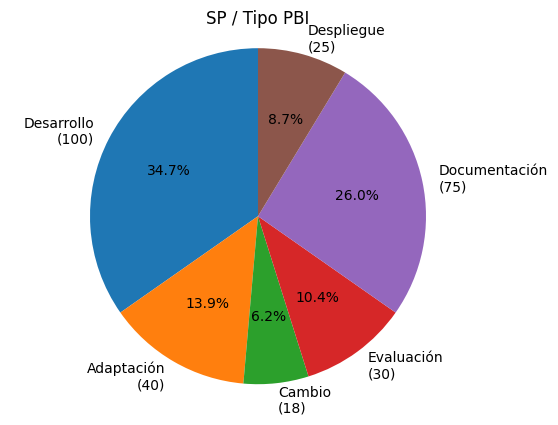

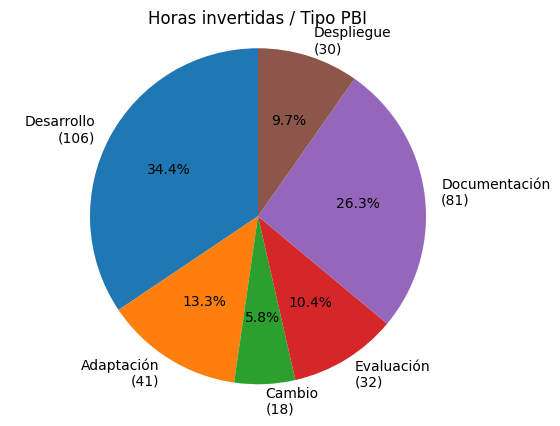

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Tipo PBI': ['Desarrollo', 'Adaptación', 'Cambio', 'Evaluación', 'Documentación', 'Despliegue'],
    'SP': [100, 40, 18, 30, 75, 25],
    'Horas': [106, 41, 18, 32, 81, 30]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(df['SP'], labels=df['Tipo PBI'], autopct='%1.1f%%', startangle=90)
for i, text in enumerate(texts):
    text.set_text(f"{df['Tipo PBI'][i]}\n({df['SP'][i]})")
ax.axis('equal')
plt.title('SP / Tipo PBI')
plt.show()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(df['Horas'], labels=df['Tipo PBI'], autopct='%1.1f%%', startangle=90)
for i, text in enumerate(texts):
    text.set_text(f"{df['Tipo PBI'][i]}\n({df['Horas'][i]})")
ax.axis('equal')
plt.title('Horas invertidas / Tipo PBI')
plt.show()


In [ ]:
import openrouteservice
import folium

# Coordenadas aproximadas del área a evitar (Barrio de Salamanca)
barrio_salamanca_coords = [
    [-3.682646, 40.427745], [-3.674138, 40.430339], [-3.675747, 40.435408],
    [-3.673425, 40.437759], [-3.673088, 40.439634], [-3.674492, 40.441355],
    [-3.682284, 40.440237], [-3.684948, 40.441816], [-3.690078, 40.441160],
    [-3.690209, 40.439032], [-3.691825, 40.434773], [-3.690725, 40.434295],
    [-3.688894, 40.433113], [-3.687563, 40.433889], [-3.686054, 40.433408],
    [-3.682646, 40.427745]
]

serrano_63_coords = [-3.676557540893555, 40.44417099771373]
san_julio_5_coords = [-3.6868035793304443, 40.43271444728054]

client = openrouteservice.Client(key='5b3ce3597851110001cf6248002b36d3e65d473b9d698a9452045d30')

route = client.directions(
    coordinates=[serrano_63_coords, san_julio_5_coords],
    profile='cycling-road',
    options={'avoid_polygons': {
        'type': 'Polygon',
        'coordinates': [barrio_salamanca_coords]
    }},
    format='geojson'
)

mapa_ruta = folium.Map(location=[40.429, -3.685], zoom_start=14)


folium.GeoJson(
    {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [barrio_salamanca_coords]
                },
                "properties": {
                    "name": "Barrio de Salamanca"
                }
            }
        ]
    },
    name='Barrio de Salamanca',
    style_function = lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5',
        'fillOpacity': 0.3,
    }
).add_to(mapa_ruta)

folium.GeoJson(route, name='route').add_to(mapa_ruta)

folium.LayerControl().add_to(mapa_ruta)

mapa_ruta



In [18]:
import folium
from shapely.geometry import Polygon

# Coordenadas del polígono de Cádiz
cadiz_coords = [
    [-6.296657276282133, 36.467258558067115],
    [-6.232819400114437, 36.491850425694295],
    [-6.288115612607413, 36.56660074727034],
    [-6.331183022973164, 36.5309238615896],
    [-6.296657276282133, 36.467258558067115]
]

polygon_cadiz = Polygon(cadiz_coords)

# Coordenadas del área a restar
rest_area_coords = [
    [-6.294029977731611, 36.529163655201714],
    [-6.291044950689411, 36.529163655201714],
    [-6.291044950689411, 36.53141992352424],
    [-6.294029977731611, 36.53141992352424],
    [-6.294029977731611, 36.529163655201714]
]

polygon_rest = Polygon(rest_area_coords)

# Verificar la validez de los polígonos
if not polygon_cadiz.is_valid:
    polygon_cadiz = polygon_cadiz.buffer(0)
if not polygon_rest.is_valid:
    polygon_rest = polygon_rest.buffer(0)

# Realizar la diferencia
cadiz_menos_rest = polygon_cadiz.difference(polygon_rest)

# Crear un mapa centrado en la primera coordenada del polígono de Cádiz
mapY = folium.Map(location=[36.529, -6.294], zoom_start=13)

# Añadir el polígono de Cádiz
folium.GeoJson(
    cadiz_menos_rest.__geo_interface__,
    name='Cádiz sin área',
    style_function=lambda feature: {
        'fillColor': '#ff0000',
        'color': '#ff0000',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(mapY)
mapY


In [32]:
import folium
import json

archivo_geojson = './maps/cadizPuntos.json'

with open(archivo_geojson) as f:
    data = json.load(f)

map_cadiz = folium.Map(location=[36.527061, -6.288596], zoom_start=13)

for feature in data['features']:
    coords = feature['geometry']['coordinates']
    lugar = feature['properties']['Lugar']
    folium.Marker(
        location=[coords[1], coords[0]],
        tooltip=f"Lugar: {lugar}"
    ).add_to(map_cadiz)

#Guardar mapa
map_cadiz.save('./maps/cadizPuntos.html')
map_cadiz

In [ ]:
import folium
import json
from shapely.geometry import shape, Polygon
import openrouteservice

archivo_geojson = './maps/cadiz.json'

with open(archivo_geojson,'r') as f:
    data = json.load(f)

map_cadiz = folium.Map(location=[36.527061, -6.288596], zoom_start=13)

polygon_a_restar = {
    "coordinates": [
          [
            [
              -6.303111536755154,
              36.52748869647192
            ],
            [
              -6.300939847579599,
              36.530586624327384
            ],
            [
              -6.307279154051798,
              36.53529100450801
            ],
            [
              -6.309284787413418,
              36.53284630313256
            ],
            [
              -6.306883249343912,
              36.52818588420338
            ],
            [
              -6.303111536755154,
              36.52748869647192
            ]
          ]
        ],
        "type": "Polygon"
}

polygon_a_restar2 = {
    "coordinates": [
          [
            [
              -6.304034168860284,
              36.52774603512512
            ],
            [
              -6.29440790363077,
              36.532232669598656
            ],
            [
              -6.29725142469897,
              36.535433931271314
            ],
            [
              -6.302629417209658,
              36.531288824976215
            ],
            [
              -6.30416871276546,
              36.53008542315747
            ],
            [
              -6.304034168860284,
              36.52774603512512
            ]
          ]
        ],
        "type": "Polygon"
}

polygon_a_restar = shape(polygon_a_restar)
polygon_a_restar2 = shape(polygon_a_restar2)

for feature in data['features']:
    if feature['geometry']['type'] == 'Polygon':
        if "Ciudad" in feature['properties']:
            coords = feature['geometry']['coordinates']
            ciudad = feature['properties']['Ciudad']
            polygon = shape(feature['geometry'])
            polygon_resultante = polygon.difference(polygon_a_restar)
            polygon_resultante = polygon_resultante.difference(polygon_a_restar2)
            feature['geometry'] = json.loads(json.dumps(polygon_resultante.__geo_interface__))
            
            folium.GeoJson(
                feature,
                name=ciudad,
                style_function=lambda x: {'fillColor': 'yellow'}
            ).add_to(map_cadiz)
    elif feature['geometry']['type'] == 'Point':
        pass

client = openrouteservice.Client(key='5b3ce3597851110001cf6248002b36d3e65d473b9d698a9452045d30')

serrano_63_coords = [-3.676557540893555, 40.44417099771373]
san_julio_5_coords = [-3.6868035793304443, 40.43271444728054]

avoid_polygon_coords = [list(coord) for coord in zip(*polygon_a_restar.exterior.coords.xy)]

route = client.directions(
    coordinates=[serrano_63_coords, san_julio_5_coords],
    profile='cycling-road',
    options={'avoid_polygons': {
        'type': 'Polygon',
        'coordinates': [avoid_polygon_coords]
    }},
    format='geojson'
)

# Add the route to the map
folium.GeoJson(
    route,
    name='route'
).add_to(map_cadiz)

map_cadiz


In [25]:
list_tran = ["A1A2","A1A3","A1A4","A2A4","A3A4","A3A5","A4A5","A2A5",
"A3A6","A5A6","A5A11","A6A7","A6A8", "A6A11", "A6A12", "A7A8","A7A11",
"A7A12", "A8A9", "A8A12", "A9A12", "A9A10", "A11A12"]

cont = 0

for feature in data['features']:
    if feature['geometry']['type'] == 'Polygon':
        if "Transicion" in feature['properties']:
            coords = feature['geometry']['coordinates']
            transicion = feature['properties']['Transicion']
            polygon = shape(feature['geometry'])
            feature['geometry'] = json.loads(json.dumps(polygon.__geo_interface__))
            trn = transicion.split("/")
            trn1 = trn[0].split("A")[1:3]
            trn2 = trn[1].split("A")[1:3][::-1]
            if(trn1[0] != trn2[0] or trn1[1] != trn2[1]):
                print("No")
            if trn[0] in list_tran:
                cont += 1
            if trn[1] in list_tran:
                cont+=1

In [1]:
import folium
import json
from shapely.geometry import shape, Polygon, MultiPolygon, mapping
import openrouteservice

client = openrouteservice.Client(key='5b3ce3597851110001cf62488ece04e449f848919d8bbe8c46b61808')

archivo_geojson = './maps/cadiz.json'

with open(archivo_geojson, 'r') as f:
    data = json.load(f)

map_cadiz = folium.Map(location=[36.527061, -6.288596], zoom_start=13)

ruta = "11-6-3-4-1".split("-")
transiciones = ["A"+ruta[i]+"A"+ruta[i+1] for i in range(len(ruta)-1)]
zonas = []

for feature in data['features']:
    if feature['geometry']['type'] == 'Polygon':
        if "Transicion" in feature['properties']:
            tr = feature['properties']['Transicion'].split("/")
            if tr[0] in transiciones or tr[1] in transiciones:
                zonas.append(shape(feature['geometry']))
        if "Ciudad" in feature['properties']:
            ciudad = shape(feature['geometry'])

print(zonas)
for zona in zonas:
    ciudad = ciudad.difference(zona)

feature['geometry'] = json.loads(json.dumps(ciudad.__geo_interface__))
folium.GeoJson(
    feature,
    name="Ciudad",
    style_function=lambda x: {'fillColor': 'yellow'}
).add_to(map_cadiz)

ini = [36.496320521168435, -6.2696313858032235]
fin = [36.533519, -6.305970]

folium.Marker(location=ini, tooltip="Inicio").add_to(map_cadiz)
folium.Marker(location=fin, tooltip="Fin").add_to(map_cadiz)

ciudad = mapping(ciudad)

try:
    route = client.directions(
        coordinates=[ini[::-1], fin[::-1]],
        profile='foot-walking',
        instructions= False,
        preference='shortest',
        options={
            'avoid_polygons': ciudad,
        },
        format='geojson'
    )
    folium.GeoJson(route, name='route').add_to(map_cadiz)
except Exception as e:
    print(e)
finally:
    display(map_cadiz)

        


[<POLYGON ((-6.287 36.52, -6.282 36.519, -6.28 36.52, -6.279 36.523, -6.28 36...>, <POLYGON ((-6.287 36.52, -6.286 36.521, -6.291 36.527, -6.298 36.53, -6.305 ...>, <POLYGON ((-6.304 36.528, -6.294 36.532, -6.297 36.535, -6.303 36.531, -6.30...>, <POLYGON ((-6.309 36.532, -6.297 36.531, -6.295 36.534, -6.308 36.535, -6.30...>]
403 ({'error': 'Access to this API has been disallowed'})


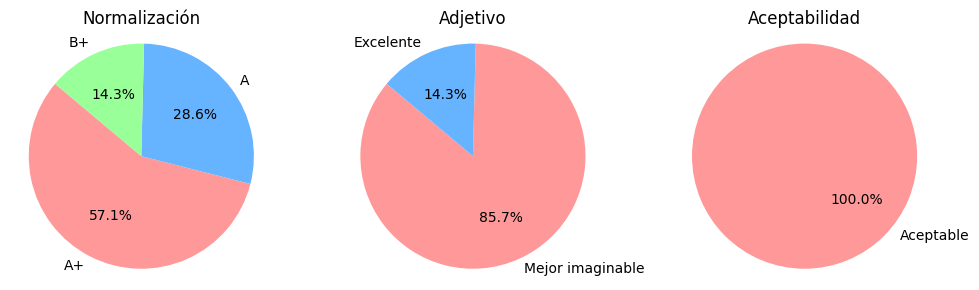

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame con los datos de la imagen
data = {
    'NORMALIZACIÓN': ['A+', 'A', 'B+', 'A+', 'A+', 'A+', 'A'],
    'ADJETIVO': ['Mejor imaginable', 'Mejor imaginable', 'Excelente', 'Mejor imaginable', 'Mejor imaginable', 'Mejor imaginable', 'Mejor imaginable'],
    'ACEPTABILIDAD': ['Aceptable', 'Aceptable', 'Aceptable', 'Aceptable', 'Aceptable', 'Aceptable', 'Aceptable']
}

df = pd.DataFrame(data)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

normalization_counts = df['NORMALIZACIÓN'].value_counts()
axs[0].pie(normalization_counts, labels=normalization_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('Normalización')
axs[0].axis('equal')

adjective_counts = df['ADJETIVO'].value_counts()
axs[1].pie(adjective_counts, labels=adjective_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axs[1].set_title('Adjetivo')
axs[1].axis('equal')

acceptability_counts = df['ACEPTABILIDAD'].value_counts()
axs[2].pie(acceptability_counts, labels=acceptability_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999'])
axs[2].set_title('Aceptabilidad')
axs[2].axis('equal')

plt.tight_layout()
plt.show()
